# 술을 많이 마시는 학생의 성적이 더 나쁠까?

모듈 임포트

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

csv자료 읽어오기(출처 : kaggle의 student-alcohol-consumption중 student-por.csv만 사용 )

In [2]:
data = pd.read_csv('C:/Users/노임령/Desktop/dataCrawling_Final_Project/student-por.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
print(np.shape(data))

(649, 33)


전체 649개의 데이터이며 33개의 열로 구성되어있음을 알 수 있다.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

### Visualizations##

#### Sex

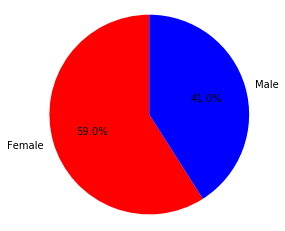

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors=['red', 'blue'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

#### Weekly study time

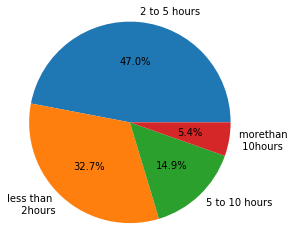

In [8]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['studytime'].value_counts().tolist(), 
        labels=['2 to 5 hours', 'less than \n 2hours', '5 to 10 hours', 'morethan \n 10hours'], 
        autopct='%1.1f%%', startangle=0)
axis = plt.axis('equal')

#### Romantic Relationship

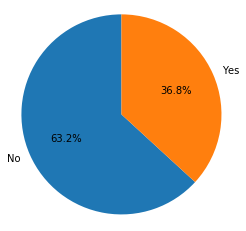

In [9]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(data['romantic'].value_counts().tolist(), 
        labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

#### Age

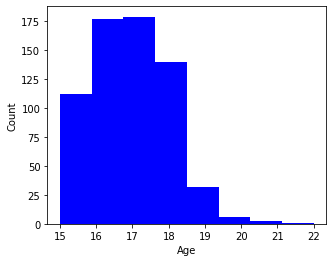

In [10]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(data['age'],  
             hist_kws={"alpha": 1, "color": "blue"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Age")

#### Alcohol Consumption and other features

##### 알콜 소비량과 건강에 대한 지수의 속성은 아래와 같다.
#Workday alcohol consumption: number from 1 (very low) to 5 (very high)
#Weekend alcohol consumption: number from 1 (very low) to 5 (very high)
#Health - current health status: number from 1 (very bad) to 5 (very good) 

#### Weekend Alcohol Consumption

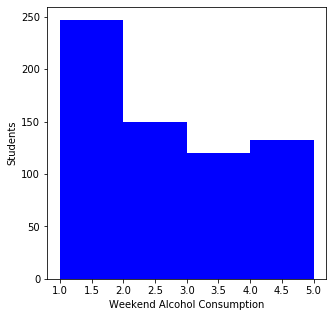

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.distplot(data['Walc'],  
             hist_kws={"alpha": 1, "color": "blue"}, 
             kde=False, bins=4)
ax = ax.set(ylabel="Students", xlabel="Weekend Alcohol Consumption")

#### Alcohol Consumption and Health

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


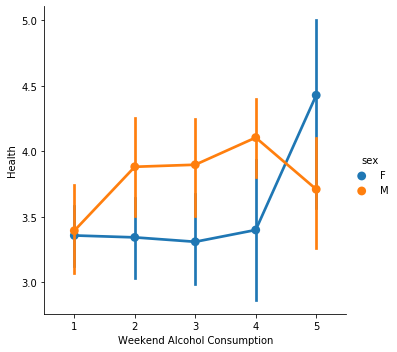

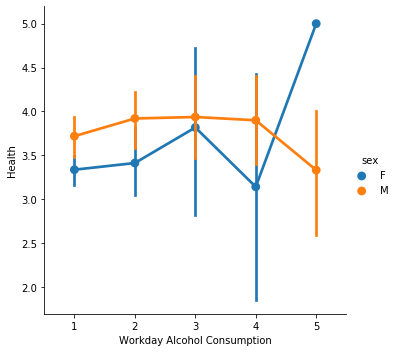

In [12]:
plot1 = sns.factorplot(x="Walc", y="health", hue="sex", data=data)
plot1.set(ylabel="Health", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=data)
plot2.set(ylabel="Health", xlabel="Workday Alcohol Consumption")

##### *알콜소비량이 많으면 건강이 나쁠 것 같다는 일반적인 상식과 다르게 알콜 소비량이 많을수록 더 건강했다.
이런 경향은 5단계의 여성에게 두드러졌다

#### Alcohol Consumption and Final Grade

#### 성적에 대한 지수속성은 아래와 같다.
Final grade: number from 0 to 20

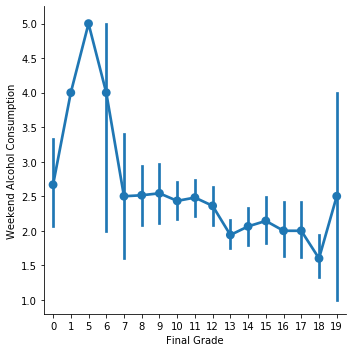

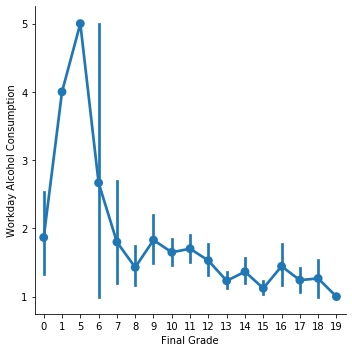

In [13]:
plot1 = sns.factorplot(x="G3", y="Walc", data=data)
plot1.set(ylabel="Weekend Alcohol Consumption", xlabel="Final Grade")

plot2 = sns.factorplot(x="G3", y="Dalc", data=data)
plot2.set(ylabel="Workday Alcohol Consumption", xlabel="Final Grade")

#### Workday Alchol Consumption과 Weekend Alchol Consumption은 모두 성적이 높을수록 알콜을 적게 섭취한다.

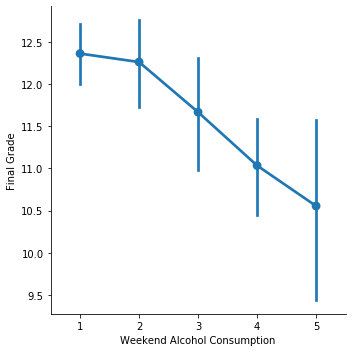

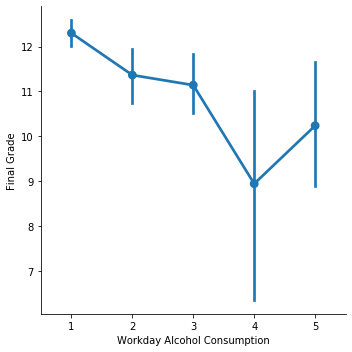

In [14]:
plot1 = sns.factorplot(x="Walc", y="G3", data=data)
plot1.set(ylabel="Final Grade", xlabel="Weekend Alcohol Consumption") 

plot2 = sns.factorplot(x="Dalc", y="G3", data=data)
plot2.set(ylabel="Final Grade", xlabel="Workday Alcohol Consumption")

#### X값과 Y값을 반대로 바꾸어보면 인과관계가 더 명확하게 보인다.
*알콜 소비량이 클수록 특히 Weekend Alchol Consumption이 많을수록 성적은 떨어진다.

#### Final Grade Prediction

#### 이제 2개의 regression 모델을 사용해서 final grade를 예측하는 실험을 할 것이다.
알고리즘은 decision tree regression, linear regression 두 가지를 사용할 것이며
G1,G2,G3는 예측에 사용할 변수들이다. 지수속성에 대한 설명은 다음과 같다.
#G1 - first period grade (numeric: from 0 to 20)
#G2 - second period grade (numeric: from 0 to 20)
#G3 - final grade (numeric: from 0 to 20, output target)

#### With G1 and G2 features

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
y = data['G3']
X = data.drop(['G3'], axis=1)

In [17]:
X = pd.get_dummies(X)
print(X)

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         0       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
644   19     2     3           1          3         1       5         4   
645   18     3     1           1          2         0       4         3   
646   18     1     1           2          2         0       1         1   
647   17     3     1           2          1         0       2         4   
648   18     3     2           3          1         0       4         4   

     goout  Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0        4     1  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
521,16,2,3,2,2,0,3,3,3,1,...,0,1,0,1,0,1,0,1,1,0
178,17,1,1,4,2,0,5,3,5,1,...,0,1,0,1,1,0,1,0,0,1
260,16,1,2,1,1,0,5,3,5,1,...,1,0,0,1,1,0,0,1,1,0
153,15,4,4,1,3,0,4,2,2,1,...,0,1,0,1,0,1,0,1,1,0
75,15,4,3,1,2,0,4,3,3,2,...,0,1,0,1,0,1,0,1,1,0


In [20]:
y_train.head()

521    10
178     8
260    11
153    13
75     11
Name: G3, dtype: int64

#### Modeling

DecisionTreeRegressor와  LinearRegression 모델을 활용한 모델링 작업

DecisionTreeRegressor를 사용한 이유 : 전처리의 필요가 없기 때문이다. 처음 공부하면서 시도하기에 가장 적합하다고 생각되어 선택하였다.
반면 과대적합 문제가 심하여 일반화하기 힘들다는 단점이 있다. 

과대적합 문제를 해결하기 위해 모델을 단순화하는 방법이 있는데, G3의 점수를 A(15to20),B(10to14),C(5to9),F(0to4)으로 단순화하여 이후 진행해볼 계획이다.

DecisionTreeRegressor

In [21]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

print("DecisionTreeRegressor 훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("DecisionTreeRegressor 테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

DecisionTreeRegressor 훈련 세트 정확도: 1.000
DecisionTreeRegressor 테스트 세트 정확도: 0.574


RandomForestClassifier

In [22]:
forest = RandomForestClassifier(n_estimators=500, random_state=0)
forest.fit(X_train,y_train)


print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.405


랜덤 포레스트를 사용하면  정확도가 높아질 것이라고 공부한 바 있어서 랜덤포레스트를 사용하였지만 정확도가 더 떨어졌다. 아무래도 희소한 데이터라서 잘 작동하지 않은 것 같다고 판단이 된다.

 LinearRegression

In [23]:
LR = LinearRegression()
LR.fit(X_train, y_train)
print("LinearRegression 훈련 세트 정확도: {:.3f}".format(LR.score(X_train, y_train)))
print("LinearRegression 테스트 세트 정확도: {:.3f}".format(LR.score(X_test, y_test)))

LinearRegression 훈련 세트 정확도: 0.848
LinearRegression 테스트 세트 정확도: 0.865


Forecast Tree와 Linear Regression의 예측 정확도를 그래프로 그려보았다.

In [24]:
# 예측은 전체 G3를 제외한 모든 변수에 대해서 수행한다.
pred_tree = tree.predict(X)
pred_lr = LR.predict(X)

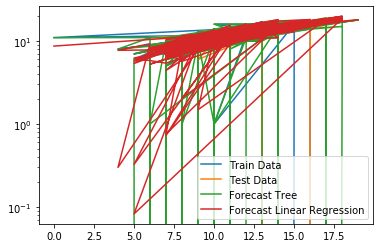

In [25]:
plt.semilogy(X_train.G1, y_train, label="Train Data")
plt.semilogy(X_test.G1, y_test, label="Test Data")
plt.semilogy(X.G1, pred_tree, label="Forecast Tree")
plt.semilogy(X.G1, pred_lr, label="Forecast Linear Regression")
plt.legend()

선형관계가 나오기를 기대했으나 너무 많은 변수를 이용하여 예측했기 때문인지 이런 형태의 그래프가 나왔다. 그나마 Forecast Linear Regression보다 Forecast Tree가 Train data에 더 가깝게 예측했음을 알 수 있다.

#### Feature Importances

In [26]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

1. Feature G2 (0.823206)
2. Feature studytime (0.022337)
3. Feature Mjob_other (0.017840)
4. Feature Medu (0.015771)
5. Feature Fedu (0.014399)
6. Feature G1 (0.012755)
7. Feature reason_other (0.012643)
8. Feature absences (0.012568)
9. Feature freetime (0.011123)
10. Feature nursery_yes (0.006492)
11. Feature goout (0.005440)
12. Feature famrel (0.005370)
13. Feature traveltime (0.004749)
14. Feature age (0.004682)
15. Feature Walc (0.003928)
16. Feature school_MS (0.002626)
17. Feature Dalc (0.002380)
18. Feature health (0.002192)
19. Feature guardian_other (0.002077)
20. Feature reason_reputation (0.002040)
21. Feature romantic_yes (0.001996)
22. Feature famsize_GT3 (0.001961)
23. Feature sex_F (0.001420)
24. Feature reason_home (0.001352)
25. Feature address_U (0.001207)
26. Feature activities_no (0.001027)
27. Feature schoolsup_yes (0.000697)
28. Feature Fjob_other (0.000669)
29. Feature Fjob_at_home (0.000578)
30. Feature famsup_yes (0.000511)
31. Feature schoolsup_no (0.000414)

#### Plot the feature importances of the forest

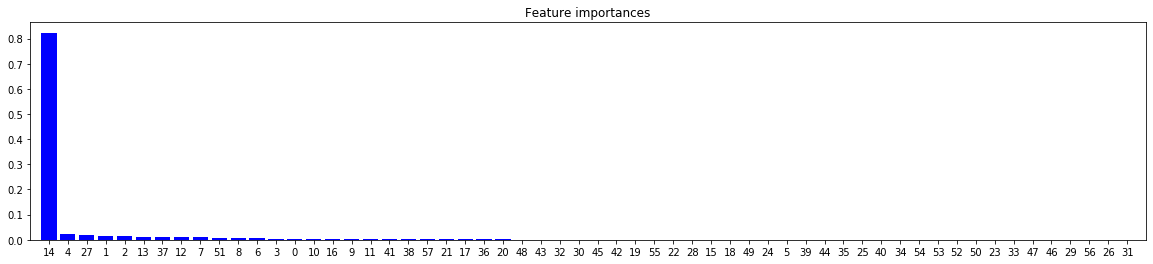

In [27]:
plt.figure(figsize=[20,4])
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="b", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

G2, Medu(Mother's education), schoolsup(Extra educational support)_yes순서로 중요한 변수라는 것을 알 수 있다.

#### Without G1 and G2 features, predict G1 & G2 & G3

In [28]:
X2 = data.drop(['G3', 'G2', 'G1'], axis=1)

In [29]:
X2 = pd.get_dummies(X2)
y2 = data['G1']
y3 = data['G2']
# y는 이미 G3

In [30]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.33, random_state=42) # G1
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y3, test_size=0.33, random_state=42) # G2
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y, test_size=0.33, random_state=42) # G3

#### G1 & G2 prediction
LinearRegression으로 G1, G2도 예측해보았다.

In [31]:
rg1 = LinearRegression()
rg1.fit(X_train1, y_train1)
print("LinearRegression & G1 훈련 세트 정확도: {:.3f}".format(rg1.score(X_train1, y_train1)))
print("LinearRegression & G1 테스트 세트 정확도: {:.3f}".format(rg1.score(X_test1, y_test1)))

LinearRegression & G1 훈련 세트 정확도: 0.407
LinearRegression & G1 테스트 세트 정확도: 0.184


In [32]:
rg2 = LinearRegression()
rg2.fit(X_train2, y_train2)
print("LinearRegression & G2 훈련 세트 정확도: {:.3f}".format(rg2.score(X_train2, y_train2)))
print("LinearRegression & G2 테스트 세트 정확도: {:.3f}".format(rg2.score(X_test2, y_test2)))

LinearRegression & G2 훈련 세트 정확도: 0.403
LinearRegression & G2 테스트 세트 정확도: 0.161


DecisionTreeRegressor과 LinearRegression을 사용한 G3의 예측

DecisionTreeRegressor

In [33]:
tree3 = DecisionTreeRegressor(random_state=0)
tree3.fit(X_train3, y_train3)
print("DecisionTreeRegressor & G3 훈련 세트 정확도: {:.3f}".format(tree3.score(X_train3, y_train3)))
print("DecisionTreeRegressor & G3 테스트 세트 정확도: {:.3f}".format(tree3.score(X_test3, y_test3)))

DecisionTreeRegressor & G3 훈련 세트 정확도: 1.000
DecisionTreeRegressor & G3 테스트 세트 정확도: -0.425


LinearRegression

In [34]:
LR3 = LinearRegression()
fitted_LR3=LR3.fit(X_train3, y_train3)
print("LinearRegression & G3 훈련 세트 정확도: {:.3f}".format(LR3.score(X_train3, y_train3)))
print("LinearRegression & G3 테스트 세트 정확도: {:.3f}".format(LR3.score(X_test3, y_test3)))

LinearRegression & G3 훈련 세트 정확도: 0.387
LinearRegression & G3 테스트 세트 정확도: 0.220


과대적합문제가 DecisionTreeRegressor보다 적어서 그런지 테스트 정확도가 LinearRegression모델이 더 높은 것을 볼 수 있다. 훈련 세트의 정확도가 많이 떨어진 것 역시 알 수 있다. 맨 처음 G1, G2를 포함한 정보를 가지고 예측한 것보다 더 예측 정확도가 떨어진 것은 G2라는 가장 영향력 있는 변수가 제외된 채로 예측을 하였기 때문이라고 생각된다.